Reproduz CURVATURA.M ANDREA PARA PYTHON

In [46]:
import numpy as np
from matplotlib import pyplot as plt
from collections import deque
import math

In [47]:
vx= 'MECH128X.dat'
vy= 'MECH128Y.dat'
nu= 128
sigma=3
tresh=0.4    #analisar (automatizar...)
n = nu

In [48]:
 # organiza valores dos vetores lidos (arq Andrea) a partir da posição 1 (lidos com 129 elem, necessários 128):
#xt = np.loadtxt(vx)
t = np.arange(128)
xt = np.sin(t/127.0 *2*np.pi) + 3 * np.random.rand(128) 
  

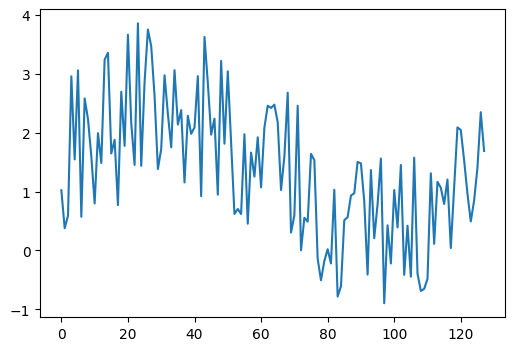

In [49]:
fig, axis = plt.subplots(figsize=(6,4))
axis.plot(t, xt)

In [50]:
# Função filtro gauss:
def gaus_filter(n, n_median, sig):
   # n: numero de dados
   #n_median: posição para o vr maximo da curva de Gaus (ex. n/2) 
   #sigma: desvio padrão da gausiana
   gaus_f = np.zeros(n , dtype = complex)   
   for i in np.arange(n):
      gaus_f[i] = (1./(sig*(np.sqrt(2*np.pi))))*np.exp((-1*(i- n_median)**2)/(2*sig**2))
   return gaus_f
 
# Calcula o espectro de energia do vetor transformado antes da gaussina
def calc_energy(tf):
    et = np.zeros(tf.shape[0], dtype = np.float32)
    for i in np.arange(tf.shape[0]):
        et[i] = (np.real(tf[i])**2) + (np.imag(tf[i])**2) 
    return et, np.sum(et)

In [51]:
## 
def gaus_smooth_signal (x,n, sigma):
   gaus = gaus_filter(n, n/2, sigma)
   trans_gaus = np.fft.fft(gaus)

   trans_x=(np.fft.fft(x))
   trans_x_smooth = trans_x * trans_gaus
   itrans_x_smooth = np.fft.fftshift(np.fft.ifft(trans_x_smooth))
   
   return itrans_x_smooth


In [58]:
# Suaviza sinal
x_smooth = gaus_smooth_signal (xt,xt.shape[-1], 90)

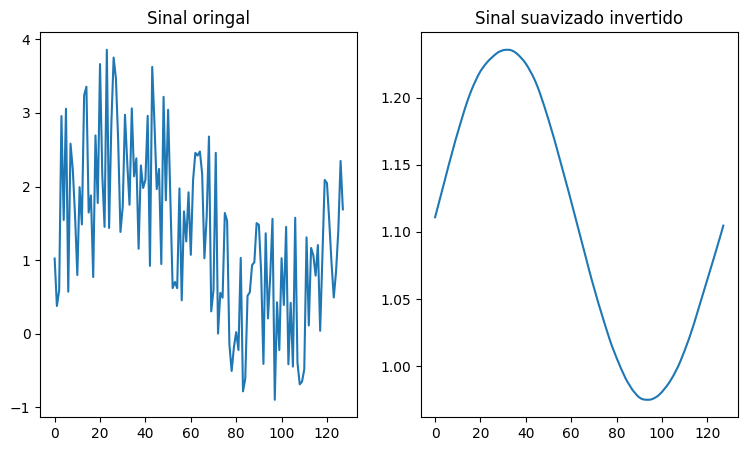

In [59]:
fig, axis = plt.subplots(1, 2, figsize=(9,5))
axis[0].plot(np.arange(n), xt )
axis[0].set( title = 'Sinal oringal') 

axis[1].plot(np.arange(n), x_smooth)
axis[1].set( title = 'Sinal suavizado invertido') 
plt.show()